In [ ]:
###############################
##### EDA #####################
###############################

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

In [ ]:
pip install sweetviz

In [ ]:
##### Import libraries ########
import pandas as pd # Data manipulation
import numpy as np # Data manipulation
import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
import sweetviz as sv # Basic EDA 
sns.set(style="darkgrid") # seaborn style

In [ ]:
!pip install ipython-autotime

In [4]:
%load_ext autotime

In [5]:
air_df = pd.read_csv("https://raw.githubusercontent.com/itsAmeMario0o/BDA718-PROJECT/master/Data/finalprojectIST718v3.csv", sep=',', error_bad_lines=False)

time: 1.24 s


In [6]:
air_df.head()

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no


time: 67.1 ms


In [7]:
air_df.shape

(129889, 28)

time: 2.94 ms


In [8]:
air_df["Satisfaction"].describe()

count    129889.000000
mean          3.379431
std           0.964620
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Satisfaction, dtype: float64

time: 21 ms


In [ ]:
df_pivot = pd.pivot_table(air_df,index=["Airline_Name"],values=["Satisfaction"],aggfunc=[np.mean]) 
df_pivot  

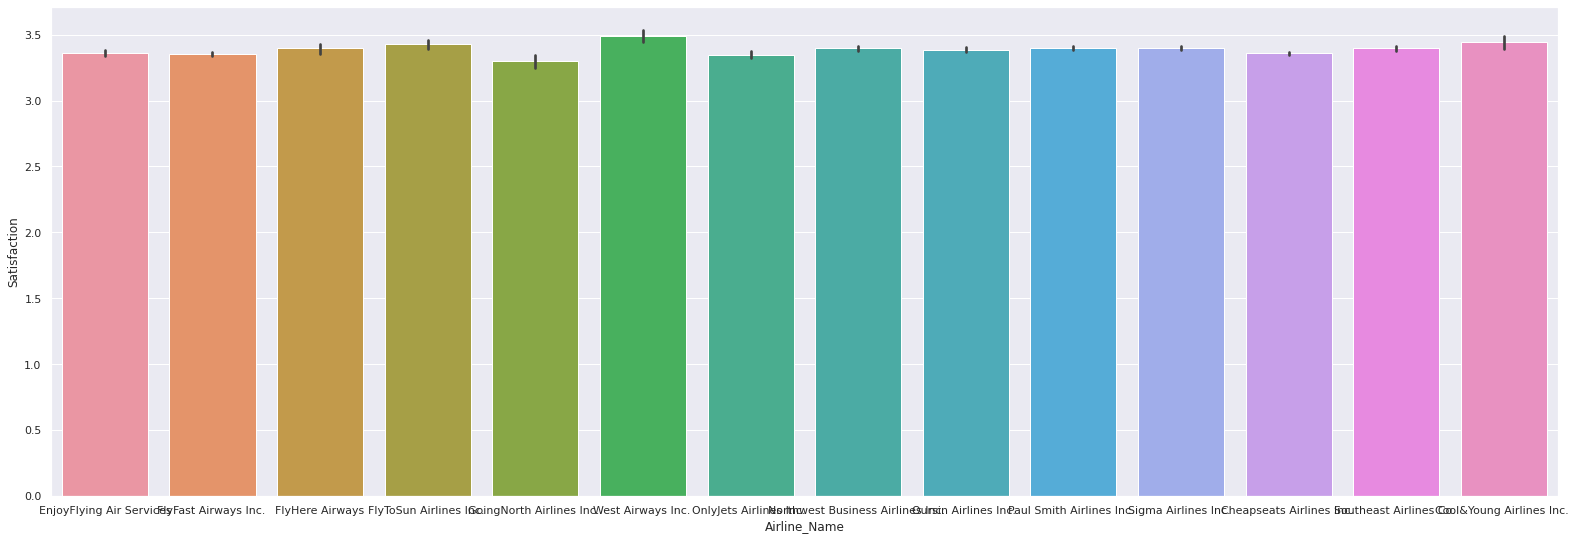

time: 1.77 s


In [9]:
sns.set(rc={'figure.figsize':(27,9)})
ax0 = sns.barplot(x="Airline_Name", y="Satisfaction", data=air_df)

In [10]:
air_df.dtypes

Satisfaction                       float64
Airline_Status                      object
Age                                  int64
Gender                              object
Price_Sensitivity                    int64
Year_of_First_Flight                 int64
No_of_Flights_perAir                 int64
%_of_Flight_with_other_Airlines      int64
Type_of_Travel                      object
No._of_other_Loyalty_Cards           int64
Shopping_Amount_at_Airport           int64
Eating_and_Drinking_at_Airport       int64
Class                               object
Day_of_Month                         int64
Flight_date                         object
Airline_Code                        object
Airline_Name                        object
Orgin_City                          object
Origin_State                        object
Destination_City                    object
Destination_State                   object
Scheduled_Departure_Hour             int64
Departure_Delay_in_Minutes         float64
Arrival_Del

time: 5.34 ms


In [ ]:
# Sweet Viz visualization
air_report = sv.analyze(air_df)

In [ ]:
# In Colab you have to open this from the files folder
air_report.show_html('air_report.html')

Report air_report.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


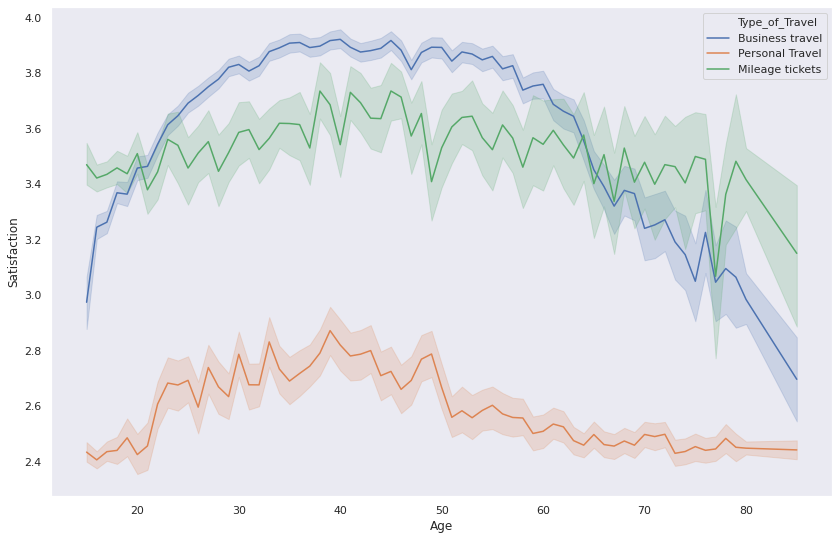

time: 6.49 s


In [11]:
# Visualize most important features with total data set
sns.set(rc={'figure.figsize':(14,9)})
ax = sns.lineplot(x="Age", y="Satisfaction", hue="Type_of_Travel", 
                  data=air_df)
ax.grid(False)

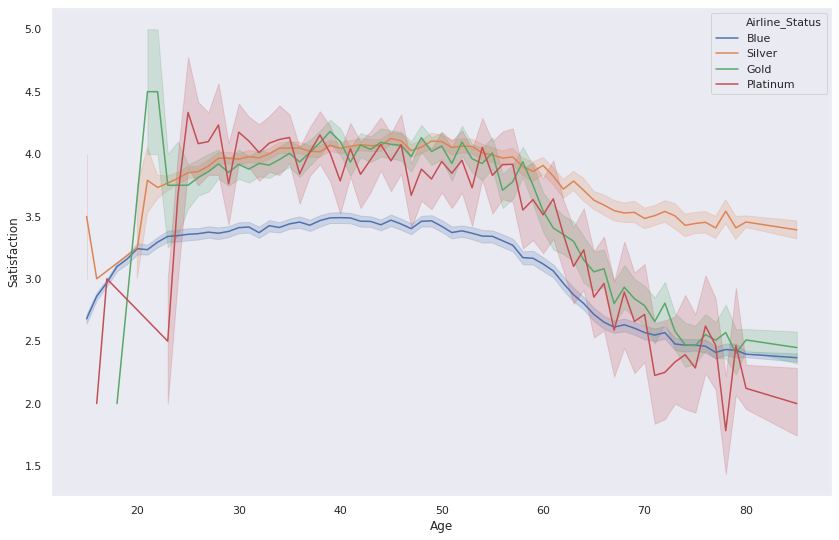

time: 7.71 s


In [12]:
sns.set(rc={'figure.figsize':(14,9)})
ax2 = sns.lineplot(x="Age", y="Satisfaction", hue="Airline_Status", 
                  data=air_df)
ax2.grid(False)

In [15]:
bin_labels_4 = ['One', 'Two', 'Three', 'Four']
air_df['Flight_loyalty_quantile'] = pd.qcut(air_df['%_of_Flight_with_other_Airlines'], q=4,
                              labels=bin_labels_4)

time: 18.6 ms


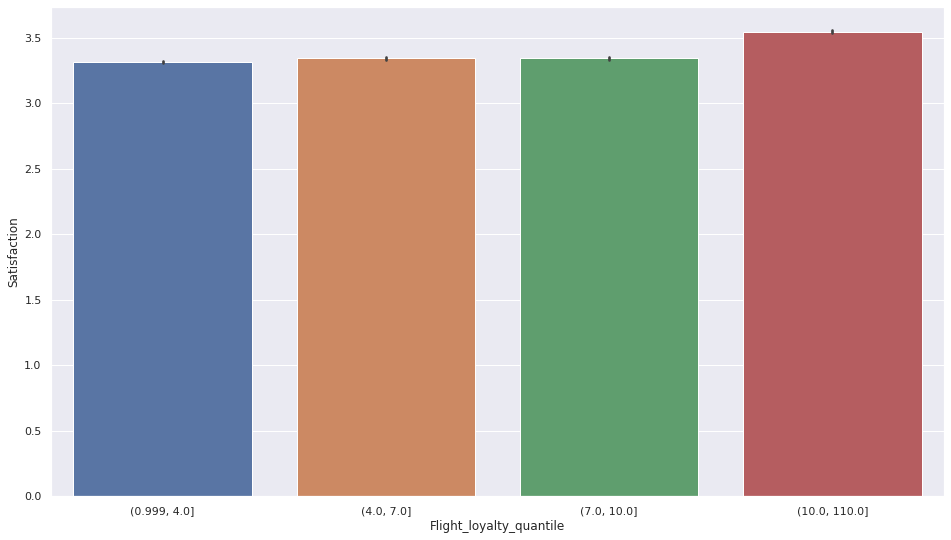

time: 1.3 s


In [108]:
sns.set(rc={'figure.figsize':(16,9)})
ax3 = sns.barplot(x="Flight_loyalty_quantile", y="Satisfaction", data=air_df)

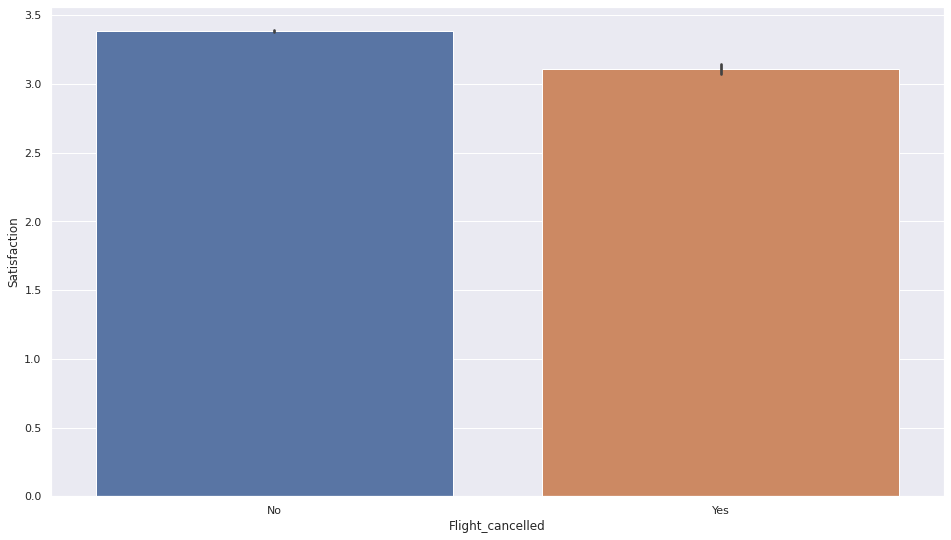

time: 1.34 s


In [109]:
sns.set(rc={'figure.figsize':(16,9)})
ax3 = sns.barplot(x="Flight_cancelled", y="Satisfaction", data=air_df)

In [13]:
air_df['Departure_delay_greater_5_Mins'] = np.where(air_df['Departure_Delay_in_Minutes']> 0, True, False)

time: 4.67 ms


In [113]:
#air_df = air_df.drop('quantile_ex_1', 1)

time: 67.5 ms


In [14]:
air_df.head(5)

,Satisfaction,Airline_Status,Age,Gender,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airlines,Type_of_Travel,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Class,Day_of_Month,Flight_date,Airline_Code,Airline_Name,Orgin_City,Origin_State,Destination_City,Destination_State,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_cancelled,Flight_time_in_minutes,Flight_Distance,Arrival_Delay_greater_5_Mins,Departure_delay_greater_5_Mins
0,4.5,Blue,31,Male,1,2007,28,7,Business travel,2,0,75,Business,18,3/18/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,15,0.0,3.0,No,134.0,821,no,False
1,4.0,Blue,56,Male,2,2006,41,3,Business travel,0,15,60,Business,11,1/11/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,2.0,5.0,No,120.0,821,no,True
2,2.5,Blue,21,Female,2,2006,8,7,Personal Travel,0,0,135,Business,25,1/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,34.0,14.0,No,122.0,853,yes,True
3,4.0,Blue,43,Male,1,2007,9,9,Business travel,2,10,45,Eco,20,2/20/2014,MQ,EnjoyFlying Air Services,"Madison, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,11,26.0,39.0,No,141.0,821,yes,True
4,5.0,Silver,49,Male,1,2006,14,10,Business travel,0,8,26,Eco,25,2/25/2014,MQ,EnjoyFlying Air Services,"Milwaukee, WI",Wisconsin,"Dallas/Fort Worth, TX",Texas,12,0.0,0.0,No,144.0,853,no,False


time: 60.1 ms


In [47]:
from statsmodels.graphics.mosaicplot import mosaic

<function matplotlib.pyplot.show>

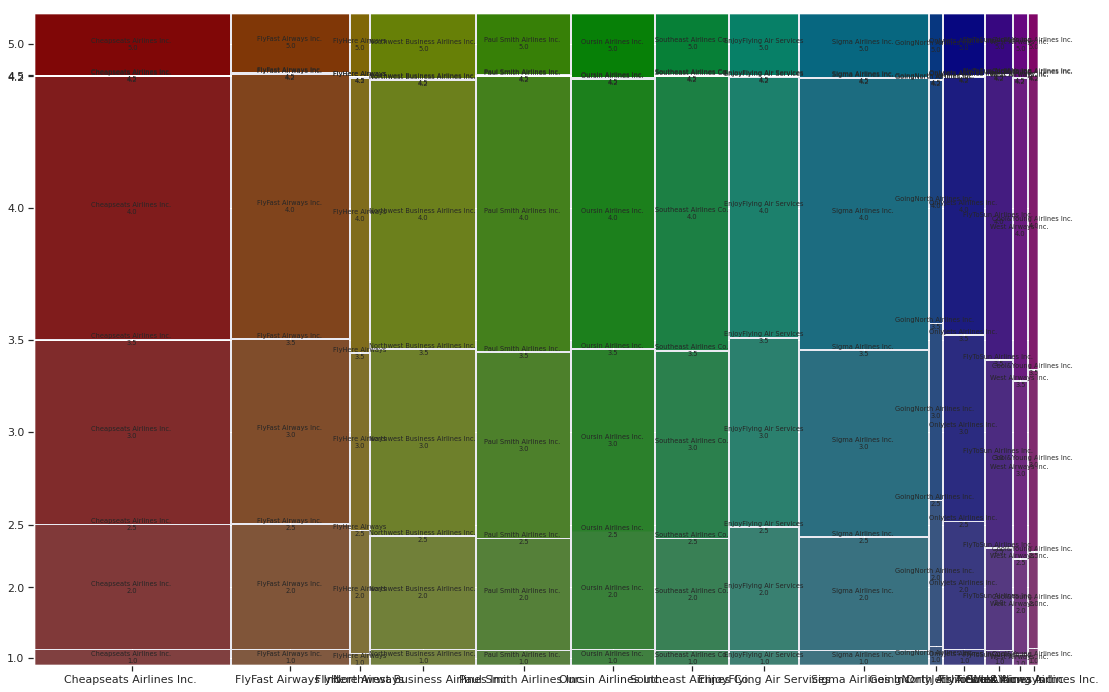

In [49]:
plt.rcParams['figure.figsize']=(18,12)
plt.rcParams['font.size'] = 8.0
mosaic(air_df.sort_values('Satisfaction'), ['Airline_Name', 'Satisfaction'], axes_label=True, gap=0.002)
plt.show

In [ ]:
###############################
##### Random Forest ###########
###############################

In [16]:
# Remove high cardinality
# air_df_m = air_df.drop(['Flight_date', 'Orgin_City','Destination_City'], axis=1)
air_df_m = air_df

time: 885 µs


In [17]:
air_df_m.loc[:, air_df_m.dtypes == 'object'] =\
    air_df_m.select_dtypes(['object'])\
    .apply(lambda x: x.astype('category'))

time: 273 ms


In [18]:
air_df_m_cat = pd.get_dummies(air_df_m,drop_first=True)

time: 474 ms


In [19]:
pd.set_option('max_rows', 99999)

time: 1.34 ms


In [20]:
air_df_m_cat.columns = [col.replace('Origin_State', 'OriSta') for col in air_df_m_cat.columns]  

time: 2.27 ms


In [21]:
air_df_m_cat.columns = [col.replace('Destination_State', 'DesSta') for col in air_df_m_cat.columns]  

time: 2.11 ms


In [22]:
air_df_m_cat.columns = [col.replace(' ', '_') for col in air_df_m_cat.columns]  

time: 2.07 ms


In [ ]:
# Are there NAs?
air_df_m_cat.isna().sum()

In [24]:
# Drop NAs, bad values
air_df_m_cat.dropna()
air_df_m_cat[air_df_m_cat==np.inf]=np.nan
air_df_m_cat.fillna(air_df_m_cat.mean(), inplace=True)

time: 11.5 s


In [25]:
# Cut column label names to a safe limit
air_df_m_cat.columns = air_df_m_cat.columns.str[:30]

time: 2.96 ms


In [26]:
# Sample for Feature importance, eventually move to full data set
air_df_m_cat_samp = air_df_m_cat.sample(frac=1, replace=False, random_state=1)

time: 270 ms


In [ ]:
#####################
### End data work ###
#####################

In [27]:
# Feature/Label Split
X = air_df_m_cat_samp.iloc[:, 1:].values
y = air_df_m_cat_samp.iloc[:, 0].values

time: 1.69 s


In [29]:
# Train/Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

time: 4.38 s


In [34]:
# Hyperparameter Tuning Grid
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 162, 275, 387, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [2, 4, 6, 10], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}
time: 8.98 ms


In [33]:
# Get RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

time: 272 ms


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation (cv), 
# search across 100 (n_iter) different combinations, and use all available cores (n_jobs =-1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
# Get best parameters
rf_random.best_params_

In [36]:
# Fit default model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 23min 14s


In [37]:
# Apply default to test 
predictions_rf = rf.predict(X_test)

time: 3.11 s


In [38]:
# Calc MAE
errors2 = abs(predictions_rf - y_test)
print('Mean Absolute Error:', round(np.mean(errors2),2), 'degrees.')

Mean Absolute Error: 0.52 degrees.
time: 5.92 ms


In [39]:
# Calc MAPE
mape = 100 * (errors2/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: 80.7 %.
time: 3.03 ms


In [ ]:
# Make model with best hyperparameters from grid search
new_rf_model = RandomForestRegressor(**rf_random.best_params_)

In [261]:
# Apply model to train
new_rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 9.65 s


In [262]:
# Apply to test, calc MAE
predictions_rf_new = new_rf_model.predict(X_test)
errors = abs(predictions_rf_new - y_test)
print('Mean Absolute Error:', round(np.mean(errors),2), 'degrees.')

Mean Absolute Error: 0.52 degrees.
time: 137 ms


In [263]:
# Calc MAPE
mape = 100 * (errors/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: 80.4 %.
time: 1.95 ms


Feature: 0, Score: 0.05139
Feature: 1, Score: 0.00083
Feature: 2, Score: 0.00319
Feature: 3, Score: 0.00308
Feature: 4, Score: 0.00281
Feature: 5, Score: 0.00310
Feature: 6, Score: 0.00498
Feature: 7, Score: 0.07951
Feature: 8, Score: 0.00400
Feature: 9, Score: 0.00230
Feature: 10, Score: 0.14373
Feature: 11, Score: 0.70109


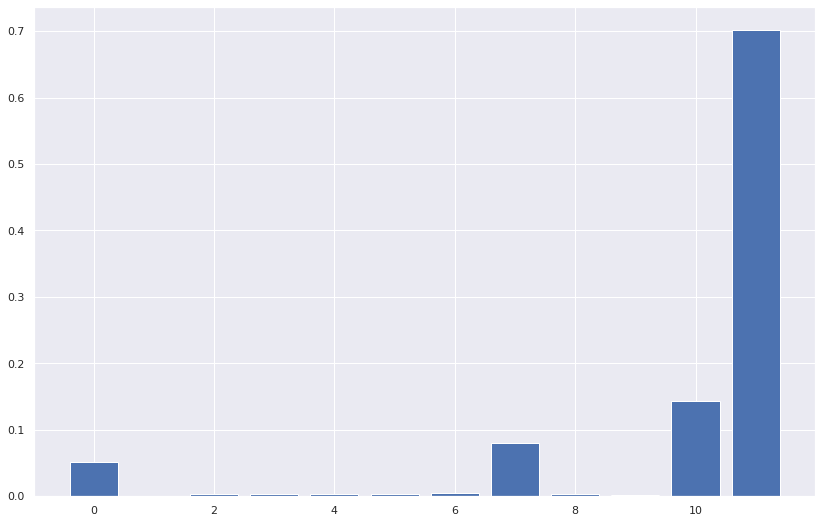

time: 551 ms


In [264]:
# Get feature importance
importance = new_rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# Feature importance from Random Forest model is 
# 1)Type_of_Travel_Personal_Travel (11)
# 2)Airline_Status_Silver (10)
# 3)Arrival_Delay_in_Minutes (7)
# 4)Age (0)

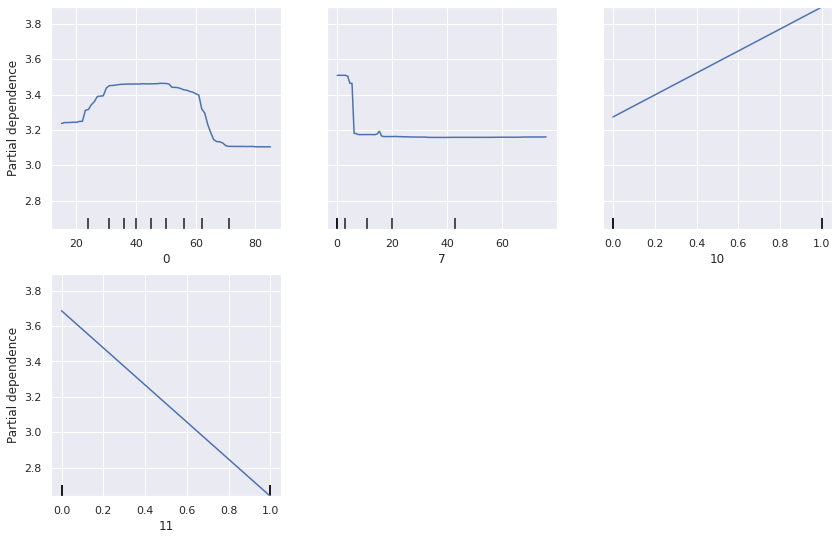

time: 32.6 s


In [265]:
# Get partial dependence plots
from sklearn.inspection import plot_partial_dependence
features = [0, 7, 10, 11]
plot_partial_dependence(new_rf_model, X_train, features) 

In [ ]:
# Get feature importance for total model
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
column_list = list(air_df_m_cat_samp)

In [ ]:
# Confirm features
column_list

In [ ]:
###############################
##### Feature Importance ######
###############################

In [ ]:
###############################
##### RFE Approach ############
###############################

In [32]:
import sklearn

In [37]:
print(sklearn.__version__)

0.22.2.post1


In [47]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [48]:
# define the method
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=8)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.708 (0.030)


>2 -0.656 (0.011)
>3 -0.794 (0.010)
>4 -0.800 (0.012)
>5 -0.798 (0.017)
>6 -0.782 (0.028)
>7 -0.762 (0.009)
>8 -0.712 (0.035)
>9 -0.703 (0.009)
>10 -0.697 (0.011)
>11 -0.696 (0.013)
>12 -0.697 (0.011)
>13 -0.695 (0.009)
>14 -0.699 (0.009)


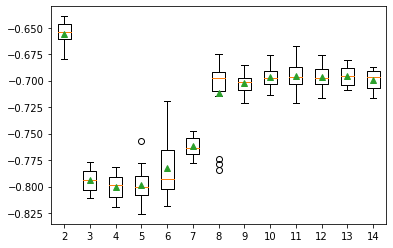

In [54]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(2, 15):
		rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=i)
		model = DecisionTreeRegressor()
		models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
	return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
 
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
air_df_m_cat_samp.head()

In [17]:
air_df_m_cat_feature = air_df_m_cat.iloc[:, [0, 1, 3,4,5,8,9,10,12,13,14,17,20]]

In [ ]:
###############################
##### SHAP Approach ###########
###############################

In [ ]:
# https://github.com/slundberg/shap

In [18]:
# Sample for POC
air_df_m_cat_feature_samp = air_df_m_cat_feature.sample(frac=0.10, replace=False, random_state=1)

In [ ]:
pip install shap

In [19]:
import xgboost
import shap

In [20]:
shap.initjs()

In [21]:
A = air_df_m_cat_feature_samp.iloc[:, 1:].values
b = air_df_m_cat_feature_samp.iloc[:, 0].values

In [22]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(A, label=b), 100)

In [24]:
# explain the model's predictions using SHAP 
explainer = shap.TreeExplainer(model) 

In [25]:
shap_values = explainer.shap_values(A)

In [ ]:
# turn to dfs to fix js issue?

In [ ]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], A.iloc[0,:])

In [33]:
air_df_m_cat_feature_samp.iloc[:, 1:].head()

,Age,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airline,Eating_and_Drinking_at_Airport,Day_of_Month,Scheduled_Departure_Hour,Arrival_Delay_in_Minutes,Flight_time_in_minutes,Flight_Distance,Airline_Status_Silver,Type_of_Travel_Personal_Travel
88334,39,2009,20,27,75,31,21,51.0,63.0,404,1,0
127487,29,2008,10,2,30,25,23,0.0,218.0,2075,0,0
67532,17,2007,11,5,317,18,14,3.0,187.0,1235,0,0
9044,37,2008,35,4,40,18,9,0.0,26.0,108,0,0
22439,36,2004,24,1,15,21,6,0.0,43.0,208,0,1


In [ ]:
A_df.head()

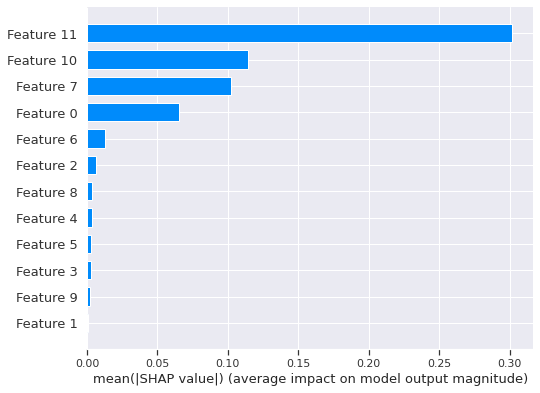

In [78]:
# SHAP feature importance
shap.summary_plot(shap_values, A, plot_type="bar")

In [ ]:
# visualize the training set predictions
# sample te data set
i = 4776
shap.force_plot(explainer.expected_value, shap_values[i], features=A[4776], feature_names=A.columns) 

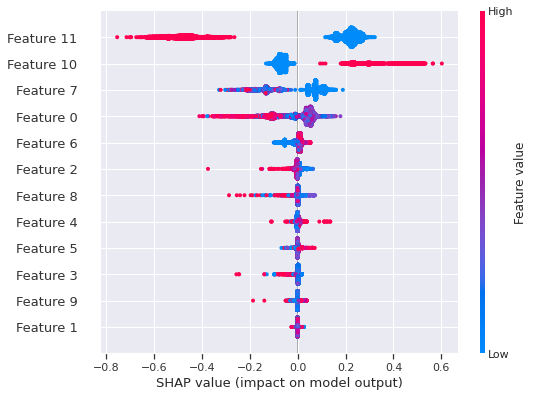

In [77]:
# summarize the effects of all the features
shap.summary_plot(shap_values, A)

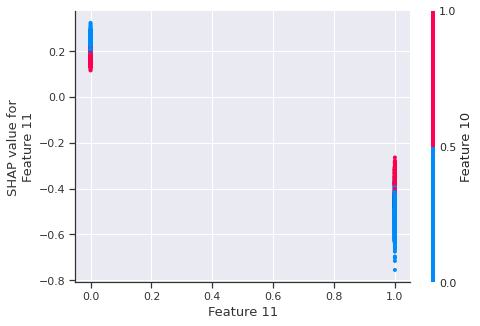

In [76]:
shap.dependence_plot('Feature 11', shap_values, A)

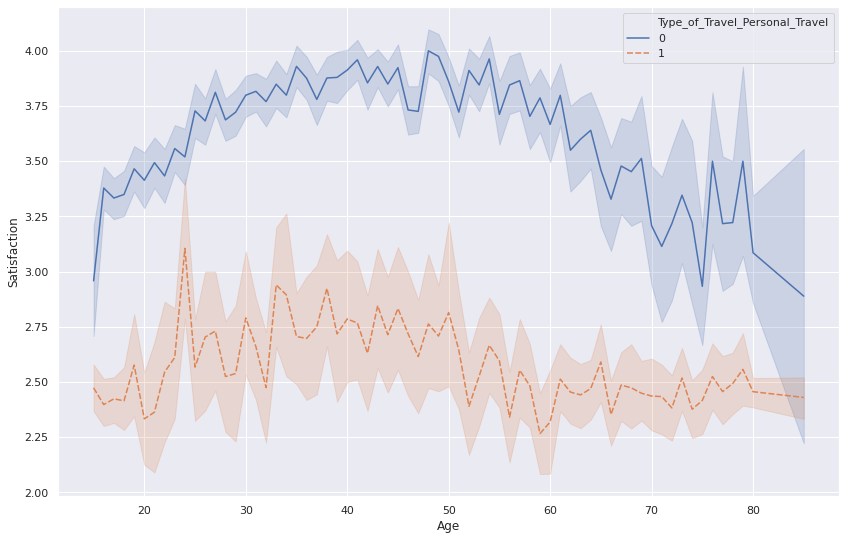

In [69]:
sns.set(rc={'figure.figsize':(14,9)})
ax = sns.lineplot(x="Age", y="Satisfaction", hue="Type_of_Travel_Personal_Travel", style="Type_of_Travel_Personal_Travel", 
                  data=air_df_m_cat_feature_samp)

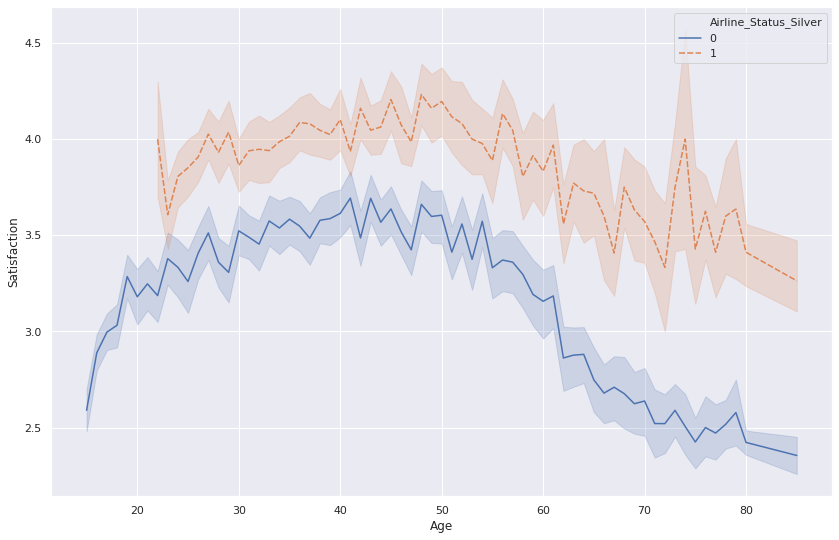

In [68]:
sns.set(rc={'figure.figsize':(14,9)})
sns.lineplot(x="Age", y="Satisfaction", hue="Airline_Status_Silver", style="Airline_Status_Silver", 
                  data=air_df_m_cat_feature_samp) 

In [ ]:
###############################
##### XGBoost #################
###############################

In [30]:
import xgboost as xgb
# https://www.datacamp.com/community/tutorials/xgboost-in-python

time: 21.9 ms


In [31]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

time: 5.25 s


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

time: 2.67 s


In [61]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 200)

time: 1.25 ms


In [62]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[15:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
time: 3min 13s


In [63]:
errors4 = abs(preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors4),2), 'degrees.')

Mean Absolute Error: 0.52 degrees.
time: 4.27 ms


In [64]:
# Calc MAPE
mape = 100 * (errors4/y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: 80.7 %.
time: 3.08 ms


In [ ]:
# https://www.datacamp.com/community/tutorials/xgboost-in-python

In [55]:
# Cross Validation
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="mae", as_pandas=True, seed=123)

time: 2min 23s


In [54]:
cv_results 

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,-2.379285,0.001384,-2.378692,0.002742
1,-2.379423,0.001334,-2.379431,0.002679


time: 23 ms


In [46]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

time: 16.9 s


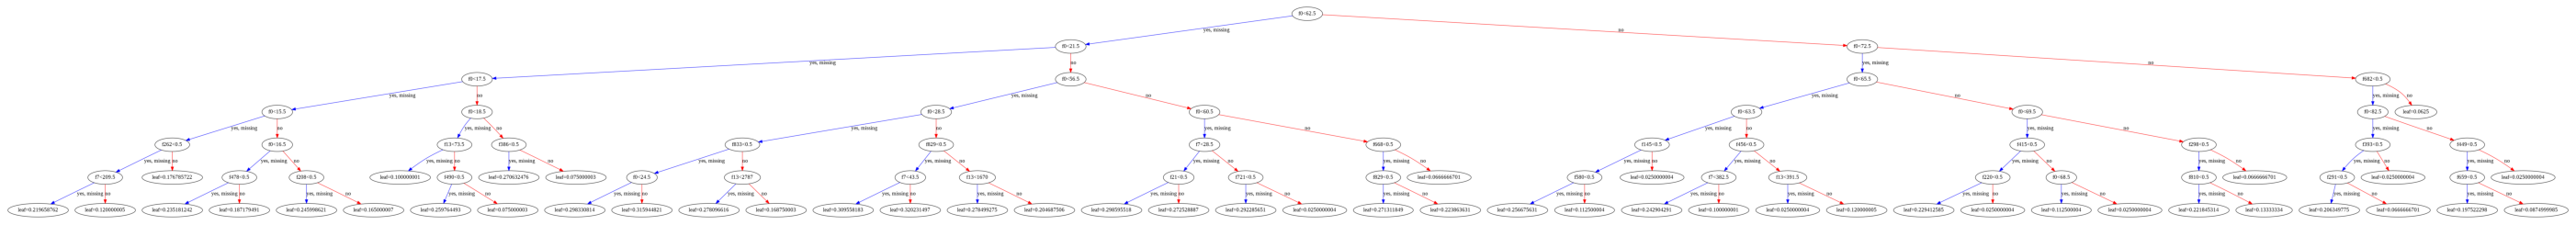

time: 2.62 s


In [65]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

In [ ]:
###############################
##### Loyalty #################
###############################

In [66]:
air_df_m_cat_samp.head()

,Satisfaction,Age,Price_Sensitivity,Year_of_First_Flight,No_of_Flights_perAir,%_of_Flight_with_other_Airline,No._of_other_Loyalty_Cards,Shopping_Amount_at_Airport,Eating_and_Drinking_at_Airport,Day_of_Month,Scheduled_Departure_Hour,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,Flight_time_in_minutes,Flight_Distance,Departure_delay_greater_5_Mins,Airline_Status_Gold,Airline_Status_Platinum,Airline_Status_Silver,Gender_Male,Type_of_Travel_Mileage_tickets,Type_of_Travel_Personal_Travel,Class_Eco,Class_Eco_Plus,Flight_date_1/10/2014,Flight_date_1/11/2014,Flight_date_1/12/2014,Flight_date_1/13/2014,Flight_date_1/14/2014,Flight_date_1/15/2014,Flight_date_1/16/2014,Flight_date_1/17/2014,Flight_date_1/18/2014,Flight_date_1/19/2014,Flight_date_1/2/2014,Flight_date_1/20/2014,Flight_date_1/21/2014,Flight_date_1/22/2014,Flight_date_1/23/2014,Flight_date_1/24/2014,...,DesSta_Louisiana,DesSta_Maine,DesSta_Maryland,DesSta_Massachusetts,DesSta_Michigan,DesSta_Minnesota,DesSta_Mississippi,DesSta_Missouri,DesSta_Montana,DesSta_Nebraska,DesSta_Nevada,DesSta_New_Hampshire,DesSta_New_Jersey,DesSta_New_Mexico,DesSta_New_York,DesSta_North_Carolina,DesSta_North_Dakota,DesSta_Ohio,DesSta_Oklahoma,DesSta_Oregon,DesSta_Pennsylvania,DesSta_Puerto_Rico,DesSta_Rhode_Island,DesSta_South_Carolina,DesSta_South_Dakota,DesSta_Tennessee,DesSta_Texas,DesSta_U.S._Pacific_Trust_Terr,DesSta_Utah,DesSta_Vermont,DesSta_Virginia,DesSta_Washington,DesSta_West_Virginia,DesSta_Wisconsin,DesSta_Wyoming,Flight_cancelled_Yes,Arrival_Delay_greater_5_Mins_y,Flight_loyalty_quantile_Two,Flight_loyalty_quantile_Three,Flight_loyalty_quantile_Four
88334,3.0,39,1,2009,20,27,2,0,75,31,21,28.0,51.0,63.0,404,True,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
127487,4.0,29,2,2008,10,2,1,0,30,25,23,0.0,0.0,218.0,2075,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
67532,3.0,17,2,2007,11,5,1,0,317,18,14,0.0,3.0,187.0,1235,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9044,4.0,37,2,2008,35,4,1,0,40,18,9,0.0,0.0,26.0,108,False,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22439,2.0,36,1,2004,24,1,0,40,15,21,6,1.0,0.0,43.0,208,True,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


time: 143 ms


In [105]:
air_df_loyal = air_df_m_cat_samp.drop('Flight_loyalty_quantile_Four', axis=1)

time: 43.1 ms


In [106]:
# Feature/Label Split

y2 = air_df_m_cat_samp.iloc[:, 5].values
X2 = air_df_m_cat_samp.drop('%_of_Flight_with_other_Airline', axis=1).values

time: 4.53 s


In [107]:
# Train/Test Split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.33, random_state=123)

time: 3.96 s


In [108]:
data_dmatrix2 = xgb.DMatrix(data=X2,label=y2)

time: 4.63 s


In [93]:
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 10, n_estimators = 200)

time: 1.61 ms


In [94]:
xg_reg2.fit(X2_train,y2_train)
preds = xg_reg2.predict(X2_test)

time: 3min 9s


In [91]:
errors5 = abs(preds - y2_test)
print('Mean Absolute Error:', round(np.mean(errors5),2), 'degrees.')

Mean Absolute Error: 2.4 degrees.
time: 3.75 ms


In [92]:
# Calc MAPE
mape = 100 * (errors5/y2_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 1), '%.')

Accuracy: 65.2 %.
time: 3.03 ms


In [ ]:
# Get feature importance
importance = xg_reg2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v)) 

In [80]:
column_list = list(air_df_m_cat_samp)

time: 1.21 ms


In [ ]:
# Confirm features
column_list

In [109]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

time: 1.09 ms


In [110]:
rf = RandomForestRegressor()

time: 774 µs


In [111]:
rf.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

time: 34min 46s


In [ ]:
predictions_rf = rf.predict(X_test)

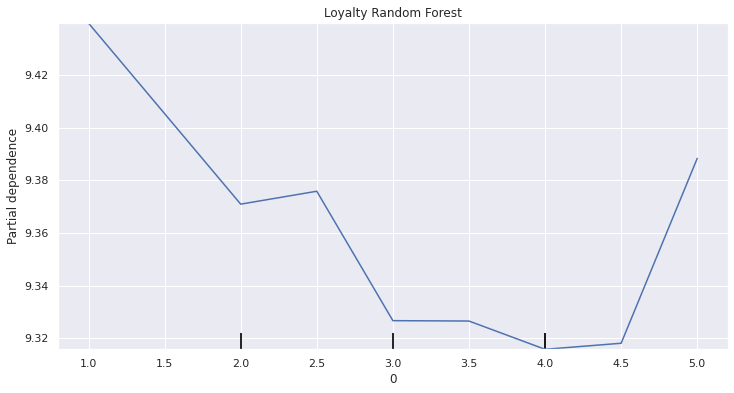

time: 1min 5s


In [116]:
# Get partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Loyalty Random Forest")
features = [0]
rf_disp = plot_partial_dependence(rf, X2_train, features, ax=ax)